In [226]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import pandas_profiling
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

In [227]:
%run libs.ipynb

In [228]:
data = pd.read_csv('data/train.csv')

In [229]:
# data.isna().sum()


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

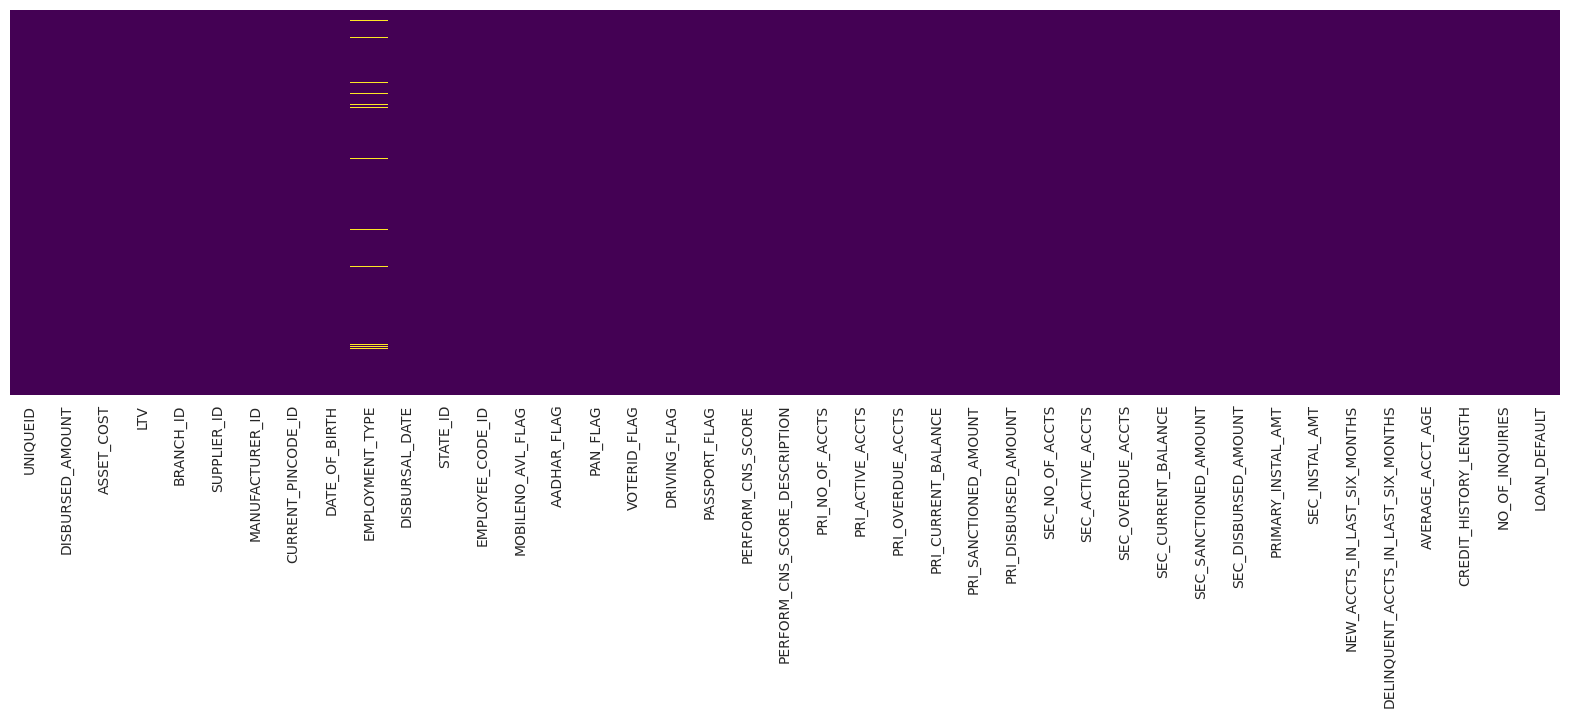

In [230]:
plt.figure(figsize=(20,5))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.plot

In [231]:
data.describe()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,STATE_ID,EMPLOYEE_CODE_ID,...,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,LOAN_DEFAULT
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [232]:
# pandas_profiling.ProfileReport(data)

In [233]:
continous_variables = [
                       'DISBURSED_AMOUNT',
                       'ASSET_COST',
                       'LTV',
                       'PERFORM_CNS_SCORE',
                       'PRI_CURRENT_BALANCE',
                       'PRI_SANCTIONED_AMOUNT',
                       'PRI_NO_OF_ACCTS'
                      
]
id_variables = ['UNIQUEID',
                'MANUFACTURER_ID',
                'CURRENT_PINCODE_ID',
                'STATE_ID',
                'EMPLOYEE_CODE_ID',
                'BRANCH_ID',
                'SUPPLIER_ID',
    
]
dates = [
    'DATE_OF_BIRTH',
    'DISBURSAL_DATE'
]

bool_variables = [
    'MOBILENO_AVL_FLAG',
    'AADHAR_FLAG',
    'PAN_FLAG',
    'VOTERID_FLAG',
    'DRIVING_FLAG',
    'PASSPORT_FLAG'
]
categorical_variables = [
    'PRI_NO_OF_ACCTS',
    'PRI_ACTIVE_ACCTS',
    'PRI_OVERDUE_ACCTS',
    'PRI_CURRENT_BALANCE',
    'PRI_SANCTIONED',
    'NO_OF_INQUIRIES',
    'NEW_ACCTS_IN_LAST_SIX_MONTHS',
    'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS'
]

nominal_variables = [
    'EMPLOYMENT_TYPE',
    'PERFORM_CNS_SCORE_DESCRIPTION',
    'CREDIT_HISTORY_LENGTH',
    'AVERAGE_ACCT_AGE'
]
other_continous_variables = [
    'PRI_DISBURSED_AMOUNT',
    'SEC_CURRENT_BALANCE',
    'SEC_SANCTIONED_AMOUNT',
    'PRIMARY_INSTAL_AMT',
    'SEC_INSTAL_AMT',
    'SEC_DISBURSED_AMOUNT'
]

#### OTHER CONTINOUS VARIABLE

In [234]:
data[other_continous_variables].describe()

,PRI_DISBURSED_AMOUNT,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,SEC_DISBURSED_AMOUNT
count,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05
mean,2.180659e+05,5.427793e+03,7.295923e+03,1.310548e+04,3.232684e+02,7.179998e+03
std,2.377744e+06,1.702370e+05,1.831560e+05,1.513679e+05,1.555369e+04,1.825925e+05
min,0.000000e+00,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,6.080000e+04,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000e+00
max,1.000000e+09,3.603285e+07,3.000000e+07,2.564281e+07,4.170901e+06,3.000000e+07


In [235]:
data = data.drop(other_continous_variables, axis=1)

### continous variables

In [236]:
data[continous_variables]

,DISBURSED_AMOUNT,ASSET_COST,LTV,PERFORM_CNS_SCORE,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_NO_OF_ACCTS
0,50578,58400,89.55,0,0,0,0
1,47145,65550,73.23,598,27600,50200,1
2,53278,61360,89.63,0,0,0,0
3,57513,66113,88.48,305,0,0,3
4,52378,60300,88.39,0,0,0,0
...,...,...,...,...,...,...,...
233149,63213,105405,60.72,735,390443,416133,4
233150,73651,100600,74.95,825,0,0,1
233151,33484,71212,48.45,0,0,0,0
233152,34259,73286,49.10,0,0,0,0


In [237]:
for feature in continous_variables:
    data = removeOutliers(data, feature)

In [238]:
data

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,PRI_SANCTIONED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
5,518279,54513,61900,89.66,67,22807,45,1501,08-09-1990,Self employed,...,0,0,0,0,0,0,1yrs 9mon,2yrs 0mon,0,0
6,529269,46349,61500,76.42,67,22807,45,1502,01-06-1988,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233134,609494,48349,96022,51.55,34,20700,48,1050,01-06-1981,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
233135,624780,39439,60334,66.30,34,20700,48,1051,01-01-1996,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
233144,613161,56059,69001,83.04,34,23024,86,1044,15-06-1963,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
233146,622612,38439,52965,74.58,34,20700,48,1051,23-07-1982,Self employed,...,14839,0,0,0,2,0,0yrs 3mon,0yrs 3mon,0,0


In [239]:
data.shape

(123739, 35)

###scaling data to positive values from o to 1. the module wont take long

In [240]:
for feature in continous_variables:
    data[feature] = scale_continous(data[feature], feature)

In [241]:
data[continous_variables].head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,PERFORM_CNS_SCORE,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_NO_OF_ACCTS
0,0.439324,0.230606,0.875911,0.000000,0.358559,0.0,0.0
2,0.490280,0.289956,0.877732,0.000000,0.358559,0.0,0.0
4,0.473295,0.268703,0.849499,0.000000,0.358559,0.0,0.0
5,0.513588,0.300784,0.878415,0.933258,0.358559,0.0,1.0
6,0.359510,0.292764,0.576958,0.000000,0.358559,0.0,0.0


In [242]:
FEATURE_MIN_MAX

[['DISBURSED_AMOUNT', 27300, 80286],
 ['ASSET_COST', 46899, 96772],
 ['LTV', 51.08, 95.0],
 ['PERFORM_CNS_SCORE', 0, 884],
 ['PRI_CURRENT_BALANCE', -53217, 95202],
 ['PRI_SANCTIONED_AMOUNT', 0, 38372],
 ['PRI_NO_OF_ACCTS', 0, 2]]

In [243]:
cols =['feature', 'min_value', 'max_value']
df = pd.DataFrame(FEATURE_MIN_MAX, columns=cols)
df.index = df.feature
del df['feature']
df.to_json('features_min_max.json', orient='index')


### Dates

In [244]:
data[dates].dtypes

DATE_OF_BIRTH     object
DISBURSAL_DATE    object
dtype: object

In [245]:
data[dates]

,DATE_OF_BIRTH,DISBURSAL_DATE
0,01-01-1984,03-08-2018
2,24-08-1985,01-08-2018
4,09-12-1977,26-09-2018
5,08-09-1990,19-09-2018
6,01-06-1988,23-09-2018
...,...,...
233134,01-06-1981,24-10-2018
233135,01-01-1996,26-10-2018
233144,15-06-1963,24-10-2018
233146,23-07-1982,26-10-2018


In [246]:
dt=datetime.today()

In [247]:
data['DATE_OF_BIRTH'] = pd.to_datetime(data['DATE_OF_BIRTH'])
data['DISBURSAL_DATE'] = pd.to_datetime(data['DISBURSAL_DATE'])

In [248]:
data[dates].dtypes

DATE_OF_BIRTH     datetime64[ns]
DISBURSAL_DATE    datetime64[ns]
dtype: object

In [249]:
data['applicates_age'] = ((dt-data['DATE_OF_BIRTH'])/365).apply(lambda x:float(x.days))
data['disbursal_age'] = ((dt-data['DISBURSAL_DATE'])/365).apply(lambda x:float(x.days))

In [250]:
data['applicates_age'].head()

0    38.0
2    37.0
4    45.0
5    32.0
6    34.0
Name: applicates_age, dtype: float64

In [251]:
del data['DATE_OF_BIRTH']

### Nominal variables

In [252]:
nominal_variables = [
    'EMPLOYMENT_TYPE',
    'PERFORM_CNS_SCORE_DESCRIPTION',
    'CREDIT_HISTORY_LENGTH',
    'AVERAGE_ACCT_AGE'
]

In [256]:
data['EMPLOYMENT_TYPE'] = data['EMPLOYMENT_TYPE'].apply(encode_employment_type)

In [257]:
data['EMPLOYMENT_TYPE'].head()

0    1
2    2
4    2
5    2
6    1
Name: EMPLOYMENT_TYPE, dtype: int64

In [258]:
data['PERFORM_CNS_SCORE_DESCRIPTION'].unique()

array(['No Bureau History Available', 'A-Very Low Risk',
       'M-Very High Risk',
       'Not Scored: Not Enough Info available on the customer',
       'I-Medium Risk', 'H-Medium Risk', 'C-Very Low Risk',
       'Not Scored: No Activity seen on the customer (Inactive)',
       'Not Scored: No Updates available in last 36 months',
       'B-Very Low Risk', 'F-Low Risk',
       'Not Scored: Sufficient History Not Available', 'K-High Risk',
       'D-Very Low Risk', 'Not Scored: Only a Guarantor', 'G-Low Risk',
       'L-Very High Risk', 'J-High Risk', 'E-Low Risk'], dtype=object)

In [259]:
data.groupby('PERFORM_CNS_SCORE_DESCRIPTION').agg({'PERFORM_CNS_SCORE':[np.min, np.max]})\
.sort_values(('PERFORM_CNS_SCORE', 'amin'))

PERFORM_CNS_SCORE          
                                                                amin      amax
PERFORM_CNS_SCORE_DESCRIPTION                                                 
No Bureau History Available                                 0.000000  0.000000
Not Scored: Only a Guarantor                                0.015837  0.015837
Not Scored: Sufficient History Not Available                0.016968  0.016968
Not Scored: No Activity seen on the customer (I...          0.018100  0.018100
Not Scored: Not Enough Info available on the cu...          0.019231  0.019231
Not Scored: No Updates available in last 36 months          0.020362  0.020362
M-Very High Risk                                            0.339367  0.339367
L-Very High Risk                                            0.340498  0.395928
K-High Risk                                                 0.397059  0.588235
J-High Risk                                                 0.589367  0.644796
I-Medium Risk                                               0.645928  0.678733
H-Medium Risk                                               0.679864  0.712670
G-Low Risk                                                  0.713801  0.735294
F-Low Risk                                                  0.736425  0.769231
E-Low Risk                                                  0.770362  0.797511
D-Very Low Risk                                             0.798643  0.831448
C-Very Low Risk                                             0.832579  0.859729
B-Very Low Risk                                             0.860860  0.910633
A-Very Low Risk                                             0.914027  1.000000

In [260]:
del data['PERFORM_CNS_SCORE_DESCRIPTION']

In [261]:
data['CREDIT_HISTORY_LENGTH']

0         0yrs 0mon
2         0yrs 0mon
4         0yrs 0mon
5         2yrs 0mon
6         0yrs 0mon
            ...    
233134    0yrs 0mon
233135    0yrs 0mon
233144    0yrs 0mon
233146    0yrs 3mon
233148    0yrs 0mon
Name: CREDIT_HISTORY_LENGTH, Length: 123739, dtype: object

In [262]:
data['CREDIT_HISTORY_LENGTH'] = data['CREDIT_HISTORY_LENGTH'].apply(clean_age_length_str)

In [263]:
data['AVERAGE_ACCT_AGE']

0         0yrs 0mon
2         0yrs 0mon
4         0yrs 0mon
5         1yrs 9mon
6         0yrs 0mon
            ...    
233134    0yrs 0mon
233135    0yrs 0mon
233144    0yrs 0mon
233146    0yrs 3mon
233148    0yrs 0mon
Name: AVERAGE_ACCT_AGE, Length: 123739, dtype: object

In [264]:
data['AVERAGE_ACCT_AGE'] = data['AVERAGE_ACCT_AGE'].apply(clean_age_length_str)

In [265]:
data['AVERAGE_ACCT_AGE'].head()

0    0.00
2    0.00
4    0.00
5    1.75
6    0.00
Name: AVERAGE_ACCT_AGE, dtype: float64

### Bolean variables

In [266]:
data[bool_variables].head()

,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG
0,1,1,0,0,0,0
2,1,1,0,0,0,0
4,1,1,0,0,0,0
5,1,1,0,0,0,0
6,1,1,0,0,0,0


In [267]:
for col in bool_variables:
    print(col)
    data[col] = data[col].astype(bool)
    print (data[col].unique())

MOBILENO_AVL_FLAG
[ True]
AADHAR_FLAG
[ True False]
PAN_FLAG
[False  True]
VOTERID_FLAG
[False  True]
DRIVING_FLAG
[False  True]
PASSPORT_FLAG
[False  True]


In [268]:
del data['MOBILENO_AVL_FLAG']

In [269]:
columns = [col.upper() for col in data.columns]
data.columns = columns

In [270]:
data.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,EMPLOYMENT_TYPE,DISBURSAL_DATE,...,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,APPLICATES_AGE,DISBURSAL_AGE
0,420825,0.439324,0.230606,0.875911,67,22807,45,1441,1,2018-03-08,...,0,0,0,0,0.00,0.0,0,0,38.0,4.0
2,417566,0.490280,0.289956,0.877732,67,22807,45,1497,2,2018-01-08,...,0,0,0,0,0.00,0.0,0,0,37.0,4.0
4,539055,0.473295,0.268703,0.849499,67,22807,45,1495,2,2018-09-26,...,0,0,0,0,0.00,0.0,1,1,45.0,4.0
5,518279,0.513588,0.300784,0.878415,67,22807,45,1501,2,2018-09-19,...,0,0,0,0,1.75,2.0,0,0,32.0,4.0
6,529269,0.359510,0.292764,0.576958,67,22807,45,1502,1,2018-09-23,...,0,0,0,0,0.00,0.0,0,0,34.0,4.0
